In [28]:
%matplotlib notebook

In [59]:
from fenics import *

In [60]:
# Create mesh and define function space
mesh = UnitSquareMesh(4, 4)

In [61]:
mesh

In [62]:
V = FunctionSpace(mesh, 'P', 1)

We define the test functions.

In [63]:
u = TrialFunction(V)
v = TestFunction(V)

Here, the boundary conditions are essential: they are not implicit via the variational formulation.

In [64]:
u_D = Expression('1 + x[0]*x[0] + 2*x[1]*x[1]', degree=2)

This function gets called with a boolean that says if it's on boundary. So here we return the boolean itself.

In [65]:
def boundary(x, on_boundary):
    return on_boundary

Now the boundary conditions.

In [66]:
bc = DirichletBC(V, u_D, boundary)

Now we can define the source term:

In [67]:
# Define variational problem

f = Constant(-6.0)

The variational problem:

In [68]:
a = dot(grad(u), grad(v))*dx
L = f*v*dx

Let's define the unknown.

In [69]:
# Compute solution
u = Function(V)

In [70]:
assemble_system(a, L, bc)

(<dolfin.cpp.la.Matrix; proxy of <Swig Object of type 'std::shared_ptr< dolfin::Matrix > *' at 0x11e1f0a50> >,
 <dolfin.cpp.la.Vector; proxy of <Swig Object of type 'std::shared_ptr< dolfin::Vector > *' at 0x11e1f0f60> >)

And now, let's solve.

In [71]:
solve(a == L, u, bc)

In [72]:
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


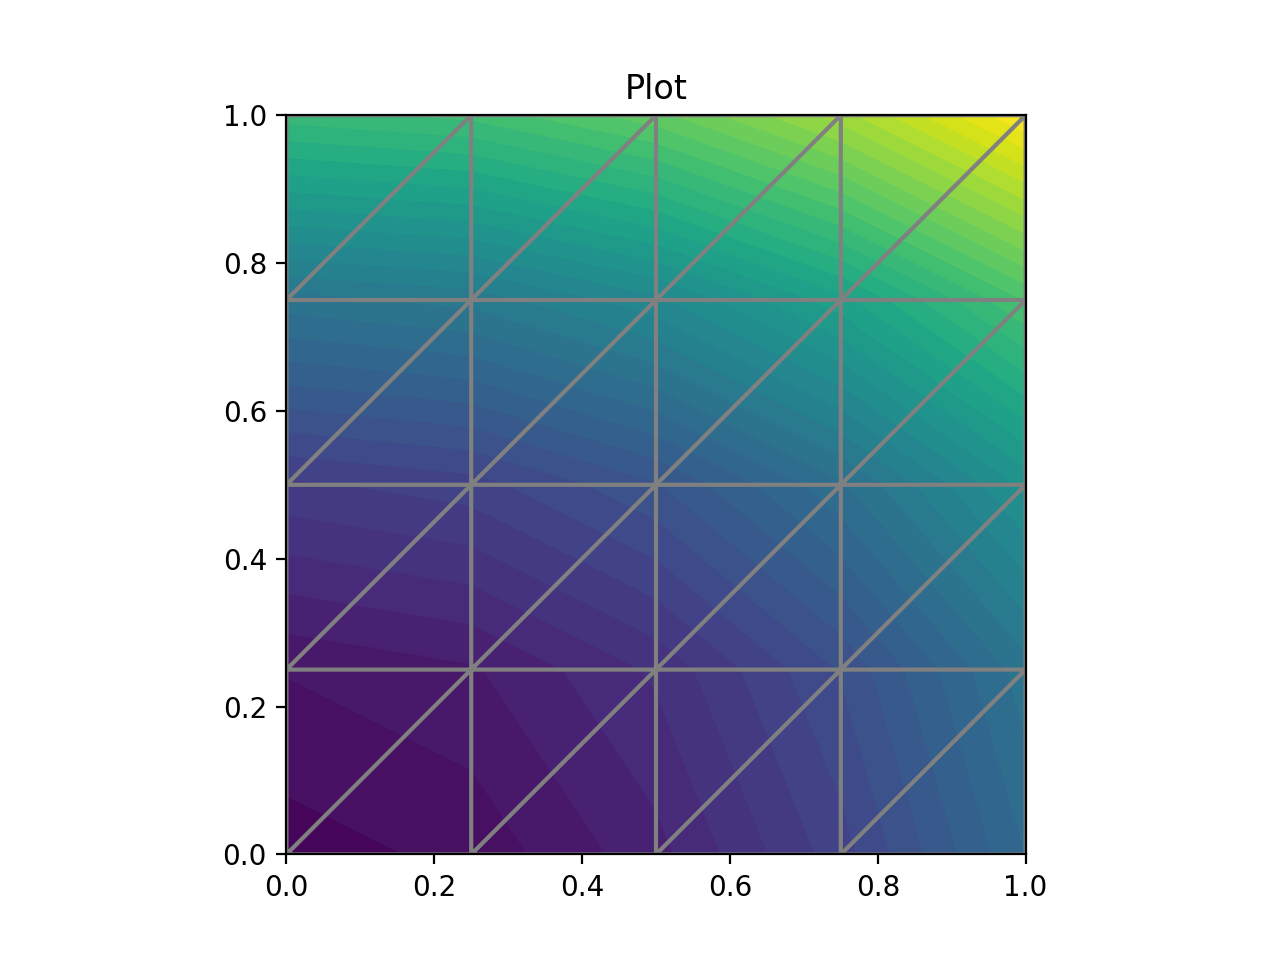

In [73]:
plt.figure()
plot(u, title='Plot')
plot(mesh)

<IPython.core.display.Javascript object>


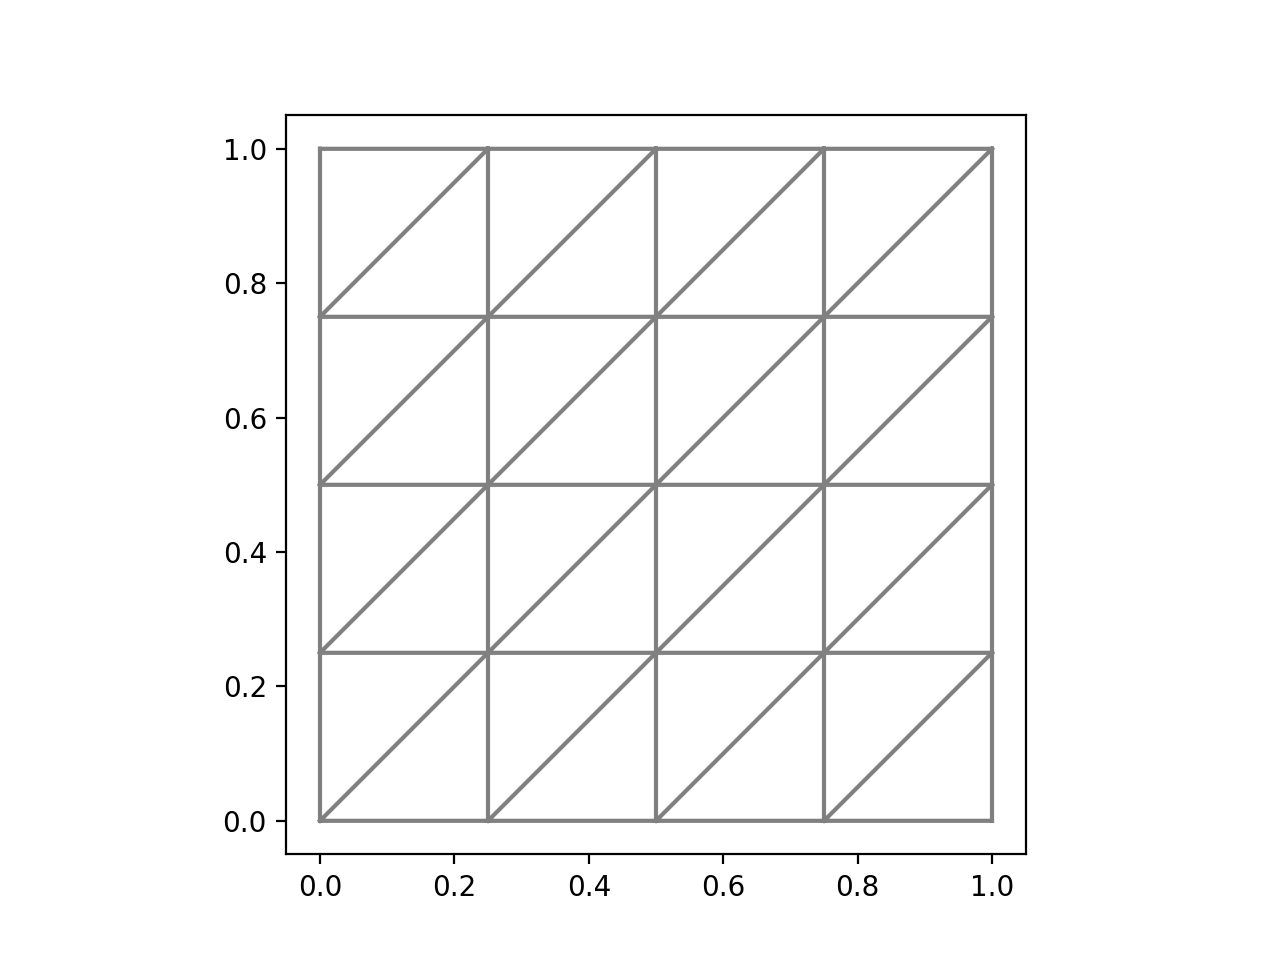

In [42]:
plt.figure()
plot(mesh)

<IPython.core.display.Javascript object>


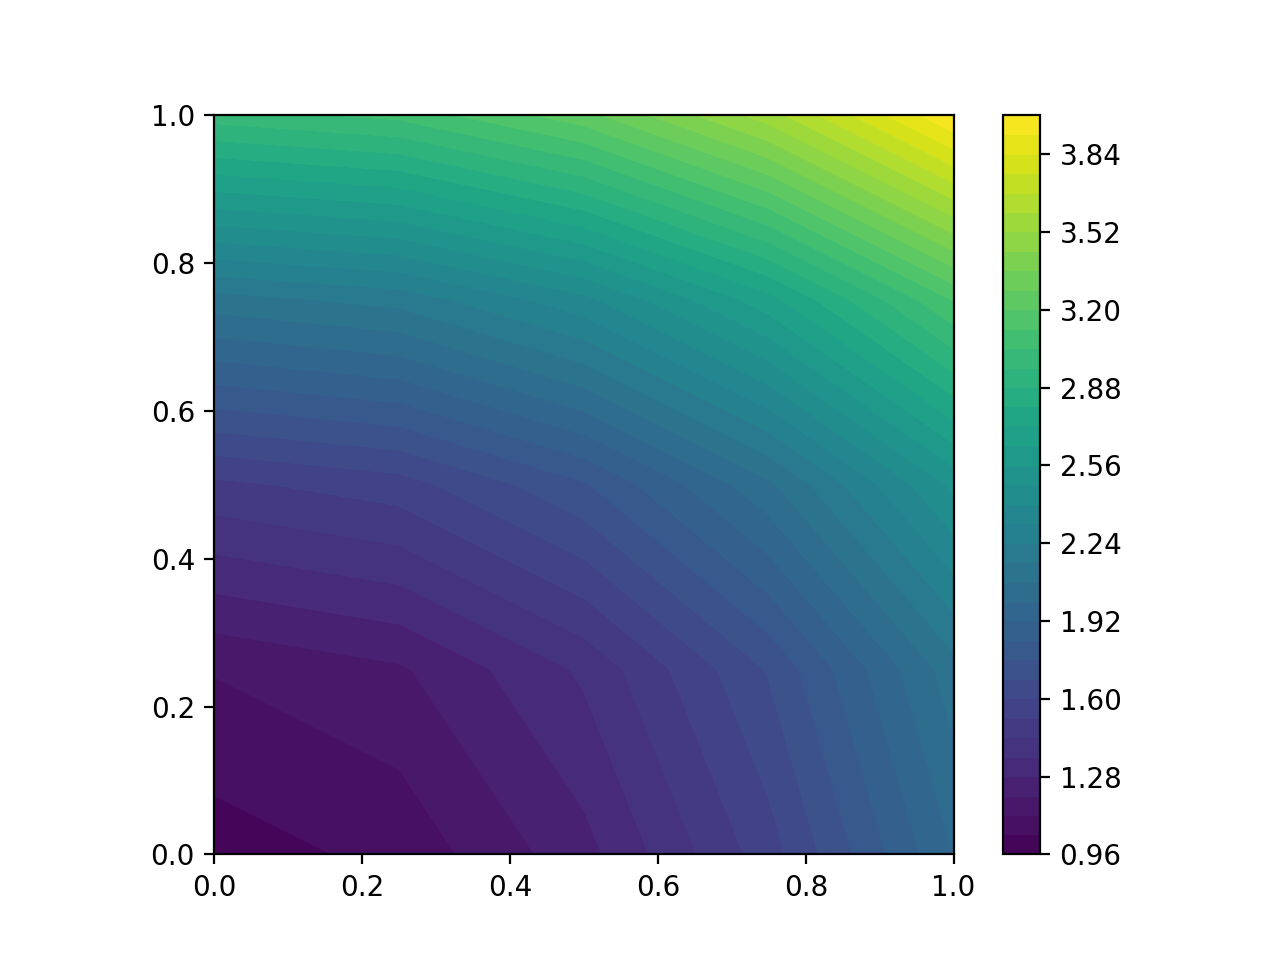

In [43]:
plt.figure()
cntour = plot(u, scalarbar=True)
plt.colorbar(cntour)

In [45]:
# Compute error in L2 norm
error_L2 = errornorm(u_D, u, 'L2')

# Compute maximum error at vertices
vertex_values_u_D = u_D.compute_vertex_values(mesh)
vertex_values_u = u.compute_vertex_values(mesh)
import numpy as np
error_max = np.max(np.abs(vertex_values_u_D - vertex_values_u))

# Print errors
print('error_L2  =', error_L2)
print('error_max =', error_max)

# Hold plot
interactive()

error_L2  = 0.032940392293421314
error_max = 1.7763568394e-15


Examining nodal values.

In [46]:
nodal_values_u = u.vector()

In [47]:
nodal_values_u

<dolfin.cpp.la.GenericVector; proxy of <Swig Object of type 'std::shared_ptr< dolfin::GenericVector > *' at 0x11cce94e0> >

In [48]:
array_u = nodal_values_u.array()

In [49]:
array_u

array([ 3.    ,  2.125 ,  3.0625,  1.5   ,  2.1875,  3.25  ,  1.125 ,
        1.5625,  2.375 ,  3.5625,  1.    ,  1.1875,  1.75  ,  2.6875,
        4.    ,  1.0625,  1.375 ,  2.0625,  3.125 ,  1.25  ,  1.6875,
        2.5   ,  1.5625,  2.125 ,  2.    ])

In [50]:
vertex_values_u = u.compute_vertex_values()

In [51]:
vertex_values_u

array([ 1.    ,  1.0625,  1.25  ,  1.5625,  2.    ,  1.125 ,  1.1875,
        1.375 ,  1.6875,  2.125 ,  1.5   ,  1.5625,  1.75  ,  2.0625,
        2.5   ,  2.125 ,  2.1875,  2.375 ,  2.6875,  3.125 ,  3.    ,
        3.0625,  3.25  ,  3.5625,  4.    ])

I can plot the solution over a line by evaluating it on a couple of points.

In [52]:
x = np.linspace(0, 1, num=20)

In [53]:
points = [(_, _) for _ in x]

In [54]:
u_line = np.array([u(point) for point in points])
u_exact = np.array([u_D(point) for point in points])

<IPython.core.display.Javascript object>


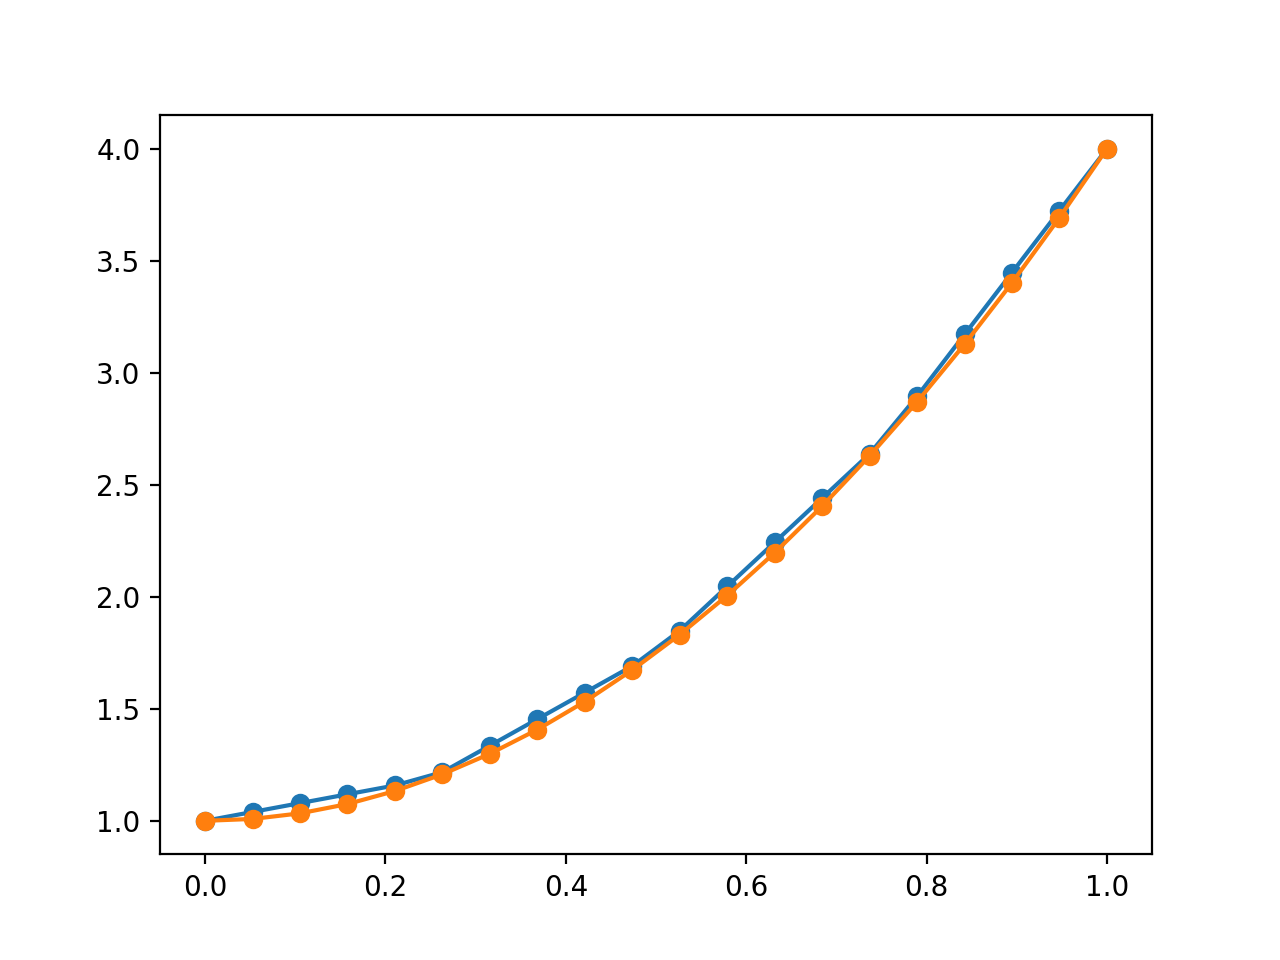

In [55]:
plt.figure()
plt.plot(x, u_line, '-o')
plt.plot(x, u_exact, '-o')

This is pretty cool. I can just evaluate the solution at the points of interest!